## Data Preparation
* Numpy array
* Pandas Dataframe
* Scipy for Statistics
*Sklearn for Machine Learning

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn

## Mean and Variance

In [2]:
# create a python array
X = np.array([0, 1, 2, 3, 4, 5])
#Calculate the mean 
X_mean = np.mean(X)
X_variance =  np.var(X)
print('mean:', X_mean)
print('variance:', X_variance)


mean: 2.5
variance: 2.9166666666666665


## Covariance

In [3]:
#Computing the covariance (method 1)
MAT_X = np.array([[0, 3], [1, 1], [2, 0]]).T
X_bar = np.mean(MAT_X,axis=1)[:,np.newaxis]
n = MAT_X.shape[0]
conv_X = (MAT_X-X_bar)@(MAT_X-X_bar).T/n
print('convariance for method 1', conv_X)
#Computing the covariance (method 2)
print('convariance for method 2', np.cov(MAT_X))

convariance for method 1 [[ 1.         -1.5       ]
 [-1.5         2.33333333]]
convariance for method 2 [[ 1.         -1.5       ]
 [-1.5         2.33333333]]


## Dot Product

In [4]:
# create another python array
Y = np.array([0, 1, 2, 3, 4, 5])
#dot product
dot_1 = np.dot(X,Y)
dot_2 = X@Y 
print('dot product np.dot(X,Y)',dot_1)
print('dot product X@Y', dot_2)

dot product np.dot(X,Y) 55
dot product X@Y 55


## Sort

In [5]:
us_arr = np.array([77,2,100,5])

print('original array',us_arr)

us_arr.sort()

print('sorted array',us_arr)

original array [ 77   2 100   5]
sorted array [  2   5  77 100]


## Array Indexing

In [6]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a[2,1])
print(a[:,1])
print(a[:1,1])
print(a[:,:])

6
[2 4 6]
[2]
[[1 2]
 [3 4]
 [5 6]]


## Eigenvalue and Eigenvector

In [7]:
A = np.array([[1,0],[0,2]])
eig_val, eig_vec = np.linalg.eig(A)
print('engivalue',eig_val)
print('engivector',eig_vec)

engivalue [1. 2.]
engivector [[1. 0.]
 [0. 1.]]


## A simple PCA

In [8]:
# a simple PAC implementation
def pca_our(X,n_components,norm=True):
  #1. Standariation 
  ##mean of each feature
  mean = np.mean(X.T,axis=1)[np.newaxis,:]
  n = X.shape[0]
  n_features = X.shape[1]
  ##Minus its mean
  if norm:
   norm_X=X-mean
  else:
    norm_X = X
  #2. computing the covariance matrix
  #conv_X = np.cov(X.T)
  conv_X = (norm_X).T@(norm_X)/n

  #3. Calculate the eigenvectors and eigenvalues
  eig_val, eig_vec = np.linalg.eig(conv_X)
  ##take the absolute value for eig_val
  eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
  #4. sort eig_vec based on eig_val from highest to lowest
  ## find the index
  eig_pairs.sort(reverse=True)
  #5. select the top k eig_vec
  feature=np.array([pair[1] for pair in eig_pairs[:n_components]])
  #get new output
  Y= -norm_X @ feature.T
  return Y


In [9]:
from sklearn.decomposition import PCA

test = np.array([[-1, 2,3], [-2, -3, 6], [-3, -4,7], [1, 5, 8], [2, 3, 5], [3, 4, 6]])

#baselines
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(test)

print(principalComponents1)
#ours
principalComponents2 = pca_our(test, n_components=2)
print(principalComponents2)

print('The bias is ', np.sum(np.abs(principalComponents1-principalComponents2)))

[[-0.26467664  2.93611956]
 [ 4.60690614 -0.11174648]
 [ 5.99636929 -1.04719645]
 [-3.76455725 -2.13070775]
 [-2.61223261  0.70448475]
 [-3.96180893 -0.35095362]]
[[-0.26467664  2.93611956]
 [ 4.60690614 -0.11174648]
 [ 5.99636929 -1.04719645]
 [-3.76455725 -2.13070775]
 [-2.61223261  0.70448475]
 [-3.96180893 -0.35095362]]
The bias is  1.0172418463127997e-14


## Obtain and preprocessing data

In [33]:
from sklearn.preprocessing import StandardScaler

# features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])

from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Separating out the features
x_raw = df.loc[:, iris.feature_names].values
# Separating out the target
y = df.loc[:, ['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x_raw)

## Reduce to one-dimension


In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0.5, 0, 'Principal Component 1')

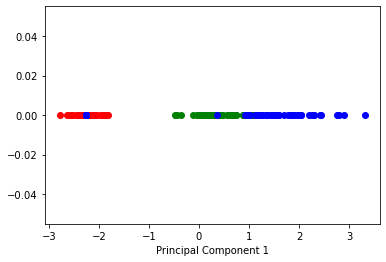

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)

y_1 = np.where(y == 0) # setosa
y_2 = np.where(y == 1) # versicolor
y_3 = np.where(y == 2) # virginica

plt.scatter(principalComponents[y_1, 0], 
            np.zeros_like(principalComponents[y_1, 0]), c = 'red')
plt.scatter(principalComponents[y_2, 0], 
            np.zeros_like(principalComponents[y_2, 0]), c = 'green')
plt.scatter(principalComponents[y_3, 0], 
            np.zeros_like(principalComponents[y_3, 0]), c = 'blue')
plt.xlabel('Principal Component 1')


## Reduce to two-dimension


Text(0, 0.5, 'Principal Component 2')

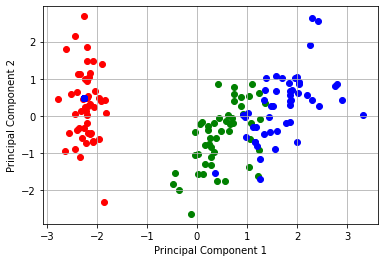

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.grid()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

y_1 = np.where(y == 0) # setosa
y_2 = np.where(y == 1) # versicolor
y_3 = np.where(y == 2) # virginica

plt.scatter(principalComponents[y_1, 0], 
            principalComponents[y_1, 1], c = 'red')
plt.scatter(principalComponents[y_2, 0], 
            principalComponents[y_2, 1], c = 'green')
plt.scatter(principalComponents[y_3, 0], 
            principalComponents[y_3, 1], c = 'blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


## Reduce to three-dimension


Text(0.5, 0, 'Principal Component 3')

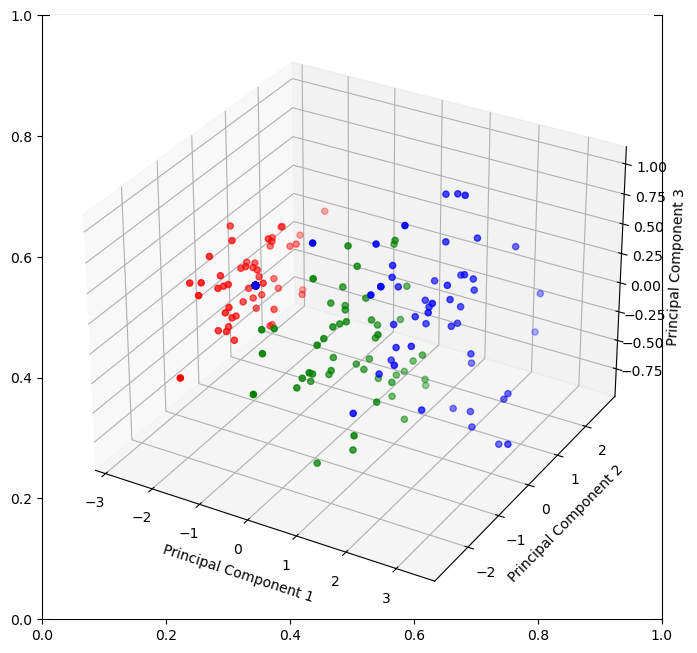

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents3 = pca.fit_transform(x)
fig, axes = plt.subplots(1,1,figsize=(8,8), dpi=100)

ax = plt.axes(projection='3d')

y_1 = np.where(y == 0) # setosa
y_2 = np.where(y == 1) # versicolor
y_3 = np.where(y == 2) # virginica

ax.scatter3D(principalComponents3[y_1,0], principalComponents3[y_1,1], principalComponents3[y_1,2], c = 'red');

ax.scatter3D(principalComponents3[y_2,0], principalComponents3[y_2,1], principalComponents3[y_2,2], c = 'green');

ax.scatter3D(principalComponents3[y_3,0], principalComponents3[y_3,1], principalComponents3[y_3,2], c = 'blue');
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


## Effects on scaling the data

[]

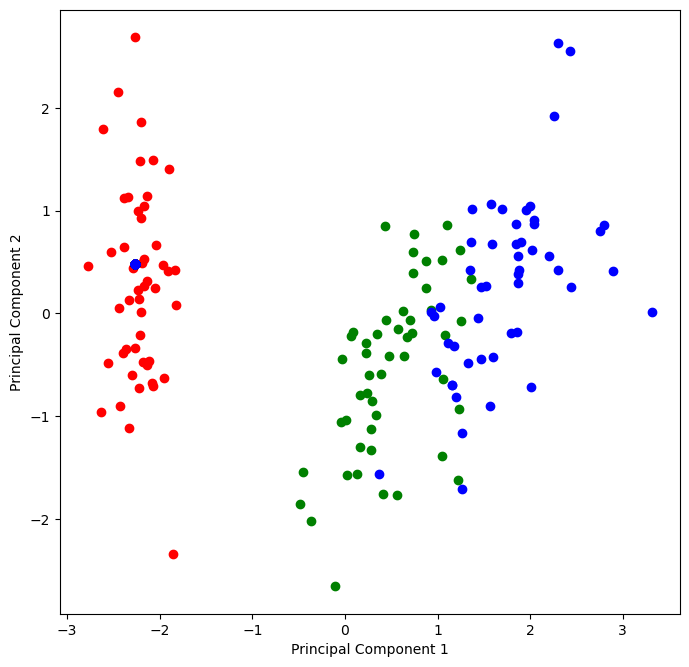

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

fig, axes = plt.subplots(1,1,figsize=(8,8), dpi=100)

y_1 = np.where(y == 0) # setosa
y_2 = np.where(y == 1) # versicolor
y_3 = np.where(y == 2) # virginica

plt.scatter(principalComponents[y_1, 0], 
            principalComponents[y_1, 1], c = 'red')
plt.scatter(principalComponents[y_2, 0], 
            principalComponents[y_2, 1], c = 'green')
plt.scatter(principalComponents[y_3, 0], 
            principalComponents[y_3, 1], c = 'blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()

[]

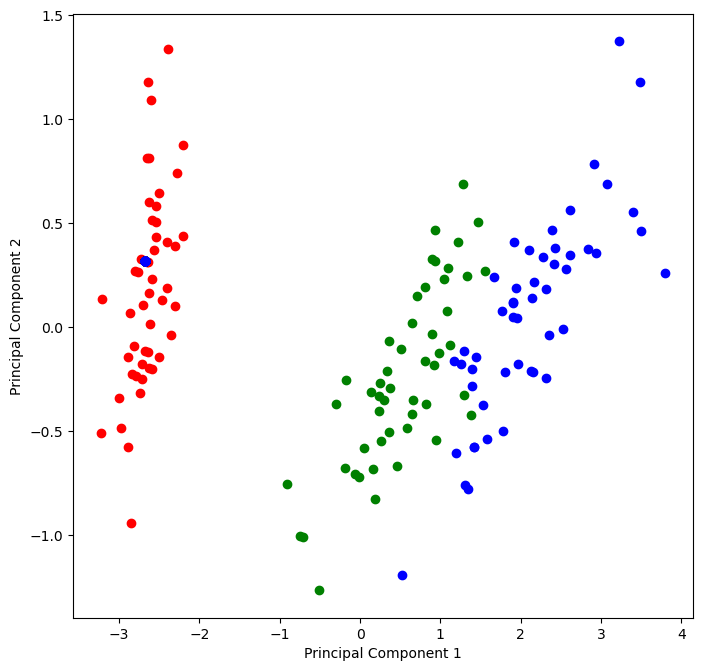

In [45]:
principalComponents_raw = pca.fit_transform(x_raw)
fig, axes = plt.subplots(1,1,figsize=(8,8), dpi=100)

plt.scatter(principalComponents_raw[y_1, 0], 
            principalComponents_raw[y_1, 1], c = 'red')
plt.scatter(principalComponents_raw[y_2, 0], 
            principalComponents_raw[y_2, 1], c = 'green')
plt.scatter(principalComponents_raw[y_3, 0], 
            principalComponents_raw[y_3, 1], c = 'blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()

## Feature analysis: biplot

the first component [-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
the ranking of important features is:
petal length (cm)
petal width (cm)
sepal length (cm)
sepal width (cm)


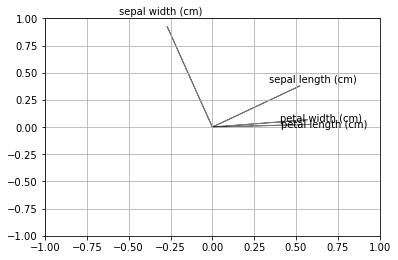

In [46]:
from sklearn.decomposition import PCA
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)


pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
print('the first component', principalComponents[0,:])

coeff = np.transpose(pca.components_[0:2, :])

n = coeff.shape[0]
for i in range(n):
      plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.5)
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, iris.feature_names[i], 
               color = 'black', ha = 'center', va = 'center')


imp_rank = np.argsort(abs( pca.components_ )[0,:])[::-1]
print('the ranking of important features is:')
for j in imp_rank:
  print(iris.feature_names[j]) 



## Feature analysis: Explained Variance

eigenvalues [2.93808505 0.9201649  0.14774182 0.02085386]
explain_ratio method 1 [0.72962445 0.22850762 0.03668922 0.00517871]
explain_ratio method 2 [0.72962445 0.22850762 0.03668922 0.00517871]
accumulated explain_ratio  [0.73 0.96 0.99 1.  ]


Text(0.5, 0, 'Number of Principal Components')

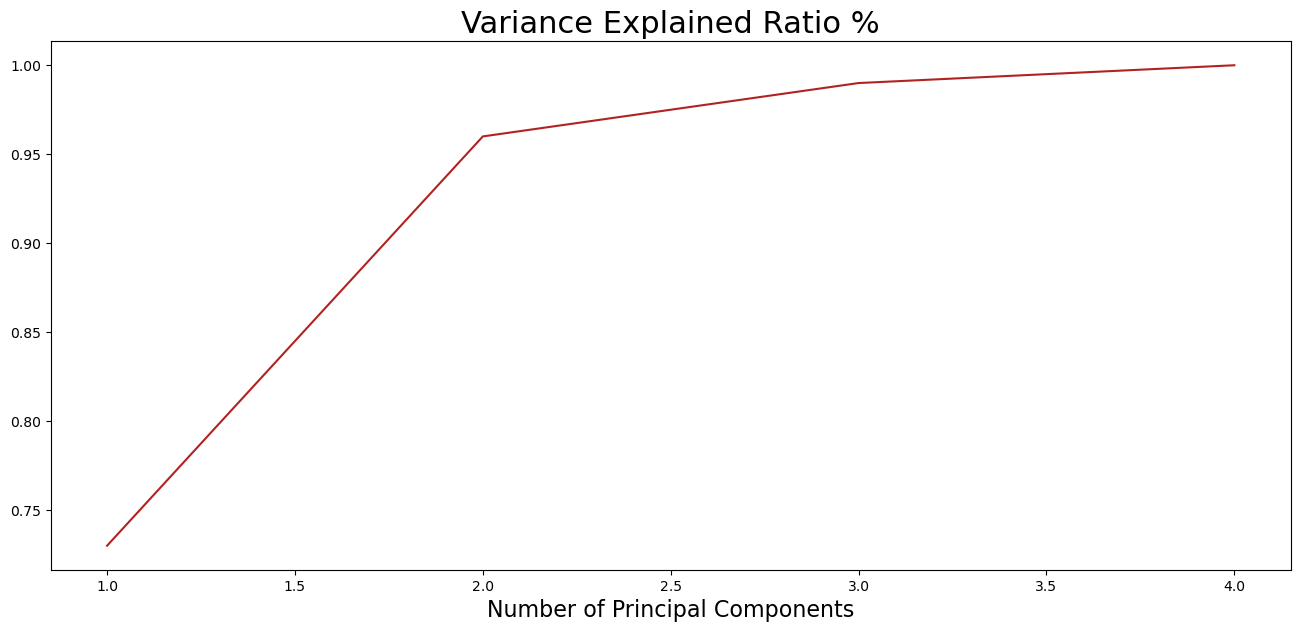

In [47]:
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
eigenvalue = pca.explained_variance_
print('eigenvalues',eigenvalue)
print('explain_ratio method 1',eigenvalue/eigenvalue.sum())
print('explain_ratio method 2',pca.explained_variance_ratio_)


explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('accumulated explain_ratio ',explain_ratio)

fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(range(1, 5), explain_ratio, color='firebrick')
plt.title('Variance Explained Ratio %', fontsize=22)
plt.xlabel('Number of Principal Components', fontsize=16)